# Car Price Prediction using Multiple Linear Regression

In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [766]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [767]:
#create header list
df.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## Preprocessing

1. Handle missing data

In [768]:
df = df.replace('?', None)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### missing data
- normalized-losses    41
- num-of-doors          2
- bore                  4
- stroke                4
- horsepower            2
- peak-rpm              2
- price                 4


In [769]:
df = df[~(df['price'].isnull())]
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [770]:
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].astype(float).mean())
df['bore'] = df['bore'].fillna(df['bore'].astype(float).mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].astype(float).mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].astype(float).mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].astype(float).mean())
df['num-of-doors'] = df['num-of-doors'].fillna(4)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct Data Format

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [772]:
df[["bore", "stroke", "price","peak-rpm","normalized-losses","horsepower"]] = df[["bore", "stroke", "price","peak-rpm","normalized-losses","horsepower"]].astype("float")

### Data Standarization

In [773]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [774]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()


In [775]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267


### Dummy variable

In [776]:
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0


In [777]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [778]:
dummy_var1 = pd.get_dummies(df['fuel-type'])
dummy_var2 = pd.get_dummies(df['aspiration'])

In [779]:
df = pd.concat([df, dummy_var1, dummy_var2], axis = 1)
df = df.drop(columns=['fuel-type','aspiration'], axis= 0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,13495.0,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,16500.0,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,154.0,5000.0,19,26,16500.0,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,102.0,5500.0,24,30,13950.0,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,115.0,5500.0,18,22,17450.0,0,1,1,0


### Analyzing individual feature

In [780]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190


#### Positive relationship

<AxesSubplot:xlabel='length', ylabel='price'>

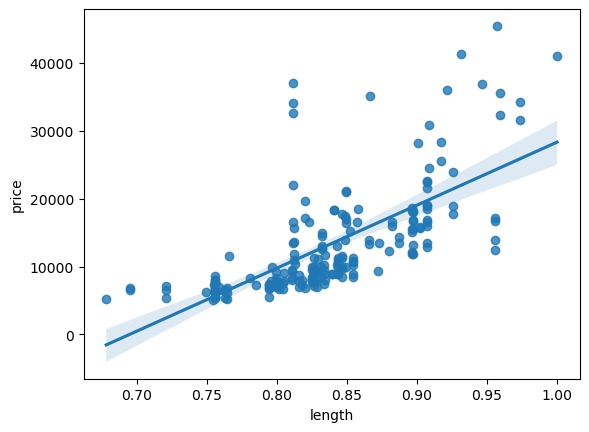

In [781]:
#correlation between length and price
sns.regplot(x = 'length', y = 'price', data = df)
# good predictor

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

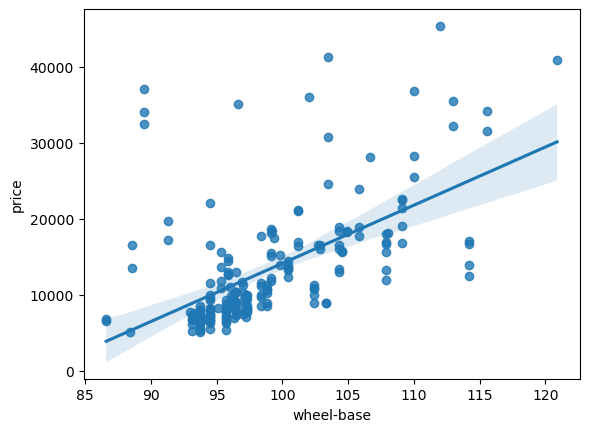

In [782]:
#correlation between wheel-base and price
sns.regplot(x = 'wheel-base', y = 'price', data = df)
# good predictor

#### Negative relationship

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

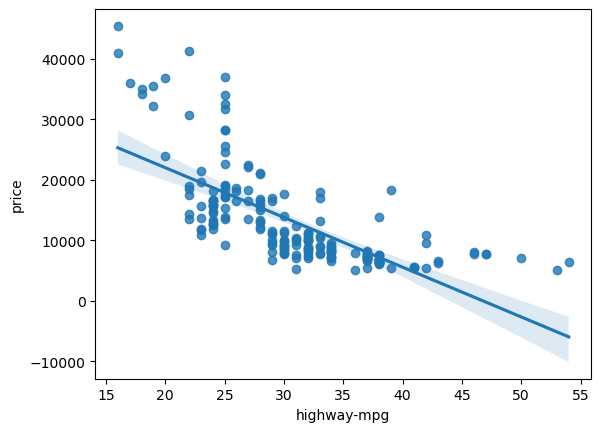

In [783]:
#correlation between highway-mpg and price
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
#good predictor

#### Weak relationship

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

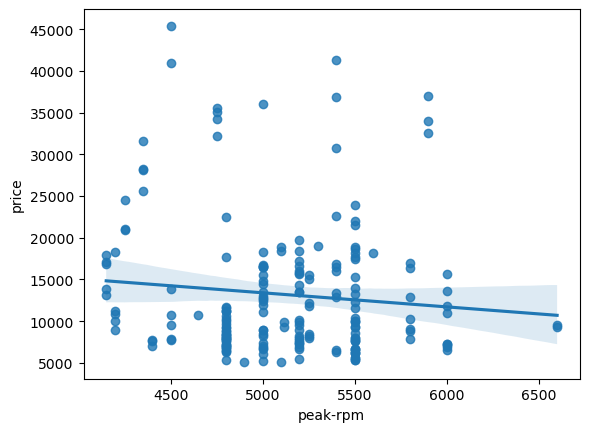

In [784]:
sns.regplot(x="peak-rpm", y="price", data=df)
# bad model predictor 

#### Categorical Variable

<AxesSubplot:xlabel='body-style', ylabel='price'>

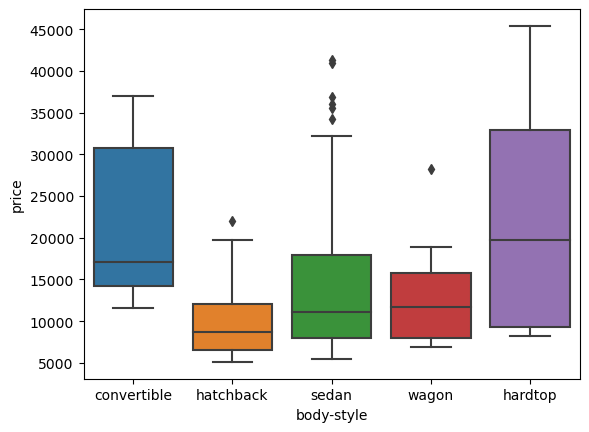

In [785]:
sns.boxplot(x = 'body-style', y = 'price', data = df) #overlap (bad predictor)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

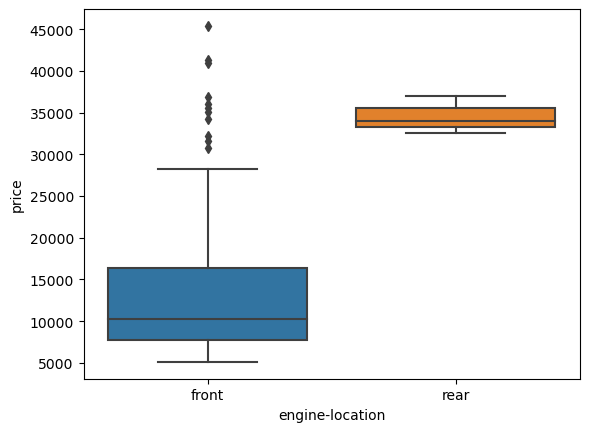

In [786]:
sns.boxplot(x="engine-location", y="price", data=df) #distinct enough (good predictor)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

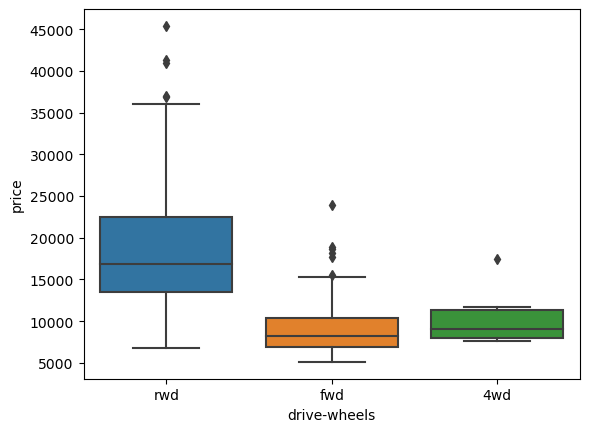

In [787]:
sns.boxplot(x="drive-wheels", y="price", data=df) #good predictor

### Descriptive analysis

In [788]:
# drive wheels descriptive analysis
df[['drive-wheels']].groupby('drive-wheels').agg({'drive-wheels' : 'count'}) #good predictor

,drive-wheels
drive-wheels,
4wd,8
fwd,118
rwd,75


In [789]:
df[['engine-location']].groupby('engine-location').agg({'engine-location' : 'count'}) #bad predictor

,engine-location
engine-location,
front,198
rear,3


In [790]:
df[['body-style']].groupby('body-style').agg({'body-style' : 'count'}) #good predictor


,body-style
body-style,
convertible,6
hardtop,8
hatchback,68
sedan,94
wagon,25


### Correlation and Causations
- p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
- the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
- the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
- the p-value is $>$ 0.1: there is no evidence that the correlation is significant.

In [791]:
df_corr = df.corr()[['price']]
df_corr.reset_index()

,index,price
0,symboling,-0.082391
1,normalized-losses,0.133999
2,wheel-base,0.584642
3,length,0.690628
4,width,0.751265
5,height,0.135486
6,curb-weight,0.834415
7,engine-size,0.872335
8,bore,0.543154
9,stroke,0.082267


In [792]:
p_val = []
for i in df_corr.index :
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    p_val.append(p_value)
    x += 1

In [793]:
df_corr['p_val'] = p_val
df_corr.columns = ['correlation', 'p_value']
df_corr

,correlation,p_value
symboling,-0.082391,2.449149e-01
normalized-losses,0.133999,5.789749e-02
wheel-base,0.584642,8.076488e-20
length,0.690628,8.016477e-30
width,0.751265,9.200336e-38
height,0.135486,5.514627e-02
curb-weight,0.834415,2.189577e-53
engine-size,0.872335,9.265492e-64
bore,0.543154,8.051209e-17
stroke,0.082267,2.456287e-01


##### Conclusion
we get attributes that can be price predictors because they have strong relationships and evidence
- wheel-base	
- length
- width	
- curb-weight	
- engine-size	
- bore		
- horsepower	
- city-mpg	
- highway-mpg		

## Model Development using Multiple Linear Regression

In [794]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

x = df[['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg','highway-mpg']]
y = df['price']

linReg.fit(x, y)
print('coef : ', linReg.coef_, '\n\nintercept : ', linReg.intercept_)

pred = linReg.predict(x)

coef :  [ 1.11774593e+02 -1.50164217e+04  4.57372549e+04  3.11513637e+00
  7.90105178e+01 -1.02377603e+03  5.95196534e+01 -1.69989555e+02
  1.84318180e+02] 

intercept :  -49226.84252106647


C:\Users\aabie\AppData\Local\Temp\ipykernel_36304\2959073535.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\aabie\AppData\Local\Temp\ipykernel_36304\2959073535.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

Text(0, 0.5, 'Proportion of Cars')

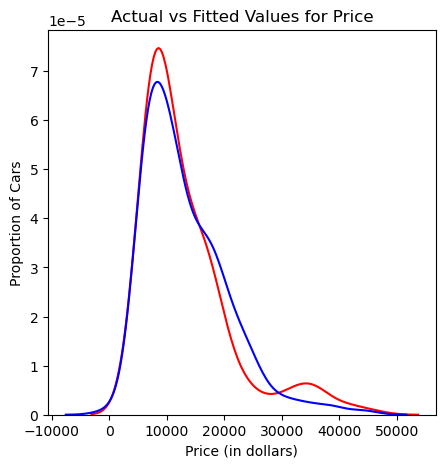

In [795]:
plt.figure(figsize=(5,5))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

## Model evaluation

In [797]:
from sklearn.metrics import mean_squared_error
print('R-Square : ', linReg.score(x, y))
print('Mean Square Error : ', mean_squared_error(y, linReg.predict(x)))

R-Square :  0.8191095245854485
Mean Square Error :  11367456.87905877


## Conclusion
This machine learning model with the multiple regression method gives an R-squared result of 0.81910 and it means This indicates that this model is good enough to predict car prices

In [ ]:
tuple_standard = 1, 2, 3
